In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing libraries to python environment

## 1. Load the dataset into python environment

In [3]:
data=pd.read_csv('titanic_dataset.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 12)

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#we have 891 rows and 12 columns,and above code shows us the different data types present in the each columns

## 2. Make ‘PassengerId’ as the index column 

In [8]:
data.set_index('PassengerId',inplace=True)

In [9]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# we have setted the index column as passenger id

## 3. Check the basic details of the dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
# here we can see the number of null vales present in each column of the dataset

In [14]:
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [15]:
# here we can see the number of unique values present in each column of the dataset 

In [16]:
dt=data.duplicated(['Ticket'])

In [17]:
dt.sum()

210

In [18]:
# from the above inference it is been noted that there are 210 duplicated tickets.

In [19]:
data.drop('Ticket',axis=1,inplace=True)

In [20]:
#since Ticket is having high number of unique vales we will drop it.

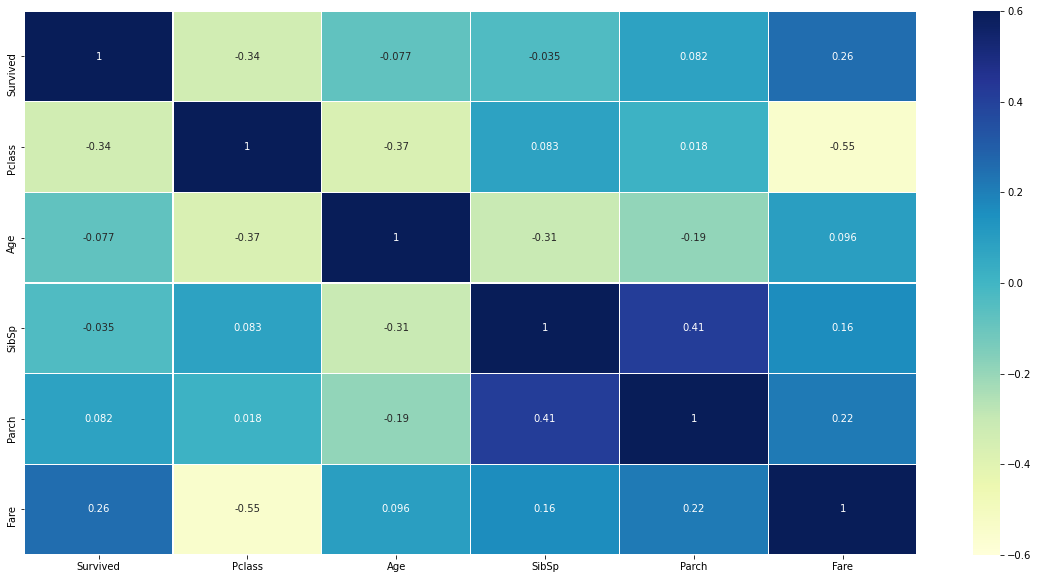

In [21]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,vmin=-0.6,vmax=0.6,annot=True,linewidths=0.2,cmap='YlGnBu')
plt.show()

In [22]:
#we can see the relation between the datasets
#it is noted that SibSp and Parch are having higher correlation compared to the other columns

In [23]:
freqgraph=data.select_dtypes(include=['float','int64'])

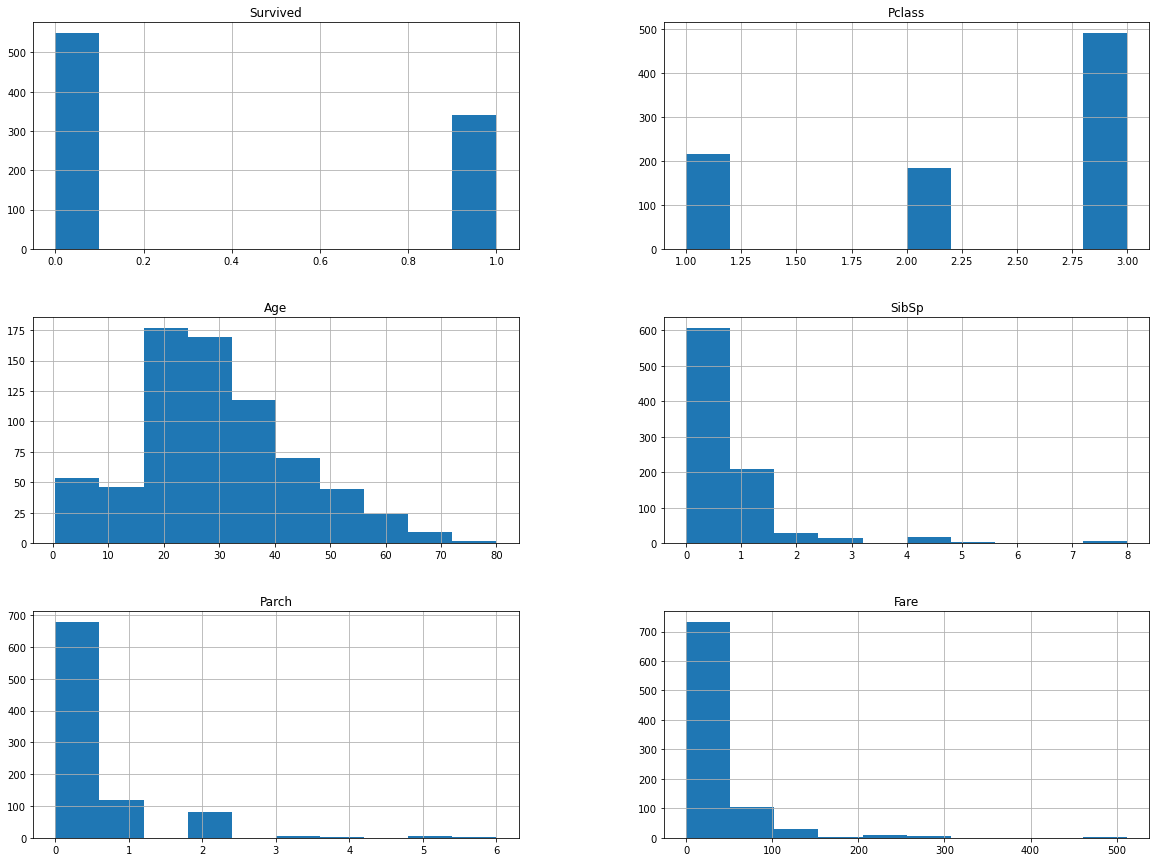

In [24]:
freqgraph.hist(figsize=(20,15))
plt.show()

In [25]:
#we can see the frequency distribution of each dataset

## 4. Fill in all the missing values present in all the columns in the dataset 

In [26]:
# it is noted that there are missing values present in Age, cabin, Embarked columns

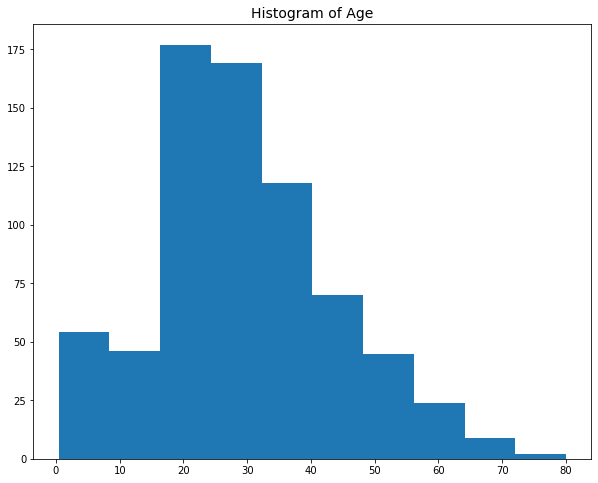

In [27]:
plt.figure(figsize=(10,8))
plt.hist(data['Age'])
plt.title('Histogram of Age',fontsize=14)
plt.show()

In [28]:
# from the histogram we can see that data is Right Skewed , there for we will fill the missing values with median value.

In [29]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [30]:
#since the Cabin column is having more than 55% missing values we will drop the column

In [31]:
data.drop('Cabin',axis=1,inplace=True)

In [32]:
#since Embarked is a Categorical value we will fill the missing values with mode.

In [33]:
data['Embarked'].mode()

0    S
dtype: object

In [34]:
data['Embarked']=data['Embarked'].fillna('S')

In [35]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [36]:
#filled all the missing values present in the column os the dataset

## 5. Check and handle outliers in at least 3 columns in the dataset 

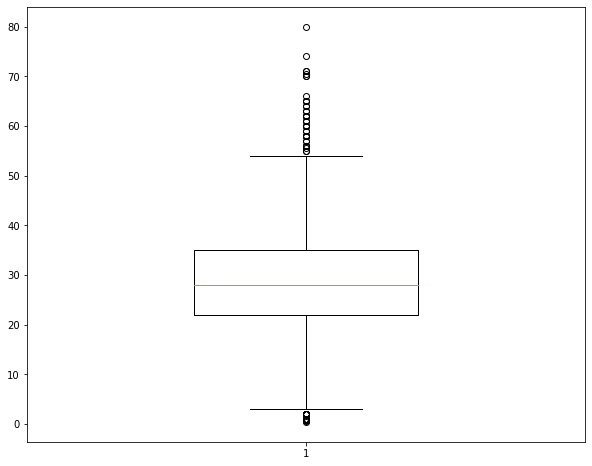

In [37]:
plt.figure(figsize=(10,8))
plt.boxplot(data['Age'],widths=0.4)
plt.show()

In [38]:
data['Age'].max()

80.0

### since the age does not cross 80 and dosen't have any negative values and also considering filling the missing values with the median , the outliers seems to be relevant and will not be removing any outliers. 

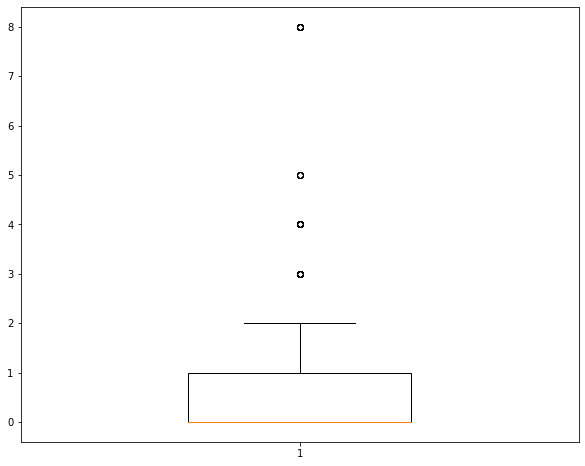

In [39]:
plt.figure(figsize=(10,8))
plt.boxplot(data['SibSp'],widths=0.4)
plt.show()

In [40]:
q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
q3=np.percentile(data['SibSp'],75,interpolation='midpoint')

In [41]:
iqr=q3-q1
lw=q1-1.5*iqr
up=q3+1.5*iqr

In [42]:
print(lw,up)

-1.5 2.5


In [43]:
outlier=[]
for x in data['SibSp']:
    if((x>up)or(x<lw)):
        outlier.append(x)

In [44]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [45]:
indx=data['SibSp']>up
dt=data.loc[indx].index

In [46]:
data.drop(dt,inplace=True)

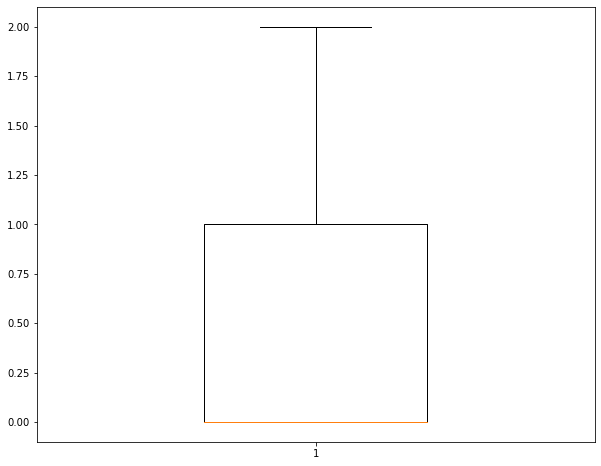

In [47]:
plt.figure(figsize=(10,8))
plt.boxplot(data['SibSp'],widths=0.4)
plt.show()

In [48]:
#the outliers are removed from the column SibSp

In [49]:
# Checking outlier present in the column parch

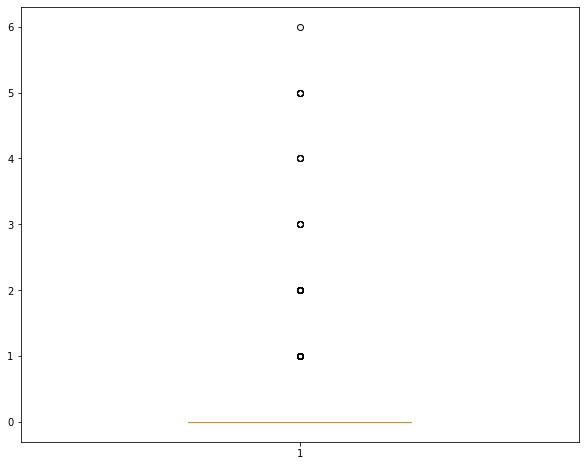

In [50]:
plt.figure(figsize=(10,8))
plt.boxplot(data['Parch'],widths=0.4)
plt.show()

In [51]:
q1=np.percentile(data['Parch'],30,interpolation='midpoint')
q2=np.percentile(data['Parch'],60,interpolation='midpoint')
q3=np.percentile(data['Parch'],90,interpolation='midpoint')
iqr=q3-q1
lw=q1-1.5*iqr
up=q3+1.5*iqr
print(lw,up)

-1.5 2.5


In [52]:
outlier=[]
for x in data['Parch']:
    if((x>up)or(x<lw)):
        outlier.append(x)

In [53]:
outlier

[5, 5, 3, 4, 4, 3, 4, 4, 5, 5, 6, 3, 3, 3, 5]

In [54]:
indx=data['Parch']>up
dt=data.loc[indx].index
data.drop(dt,inplace=True)

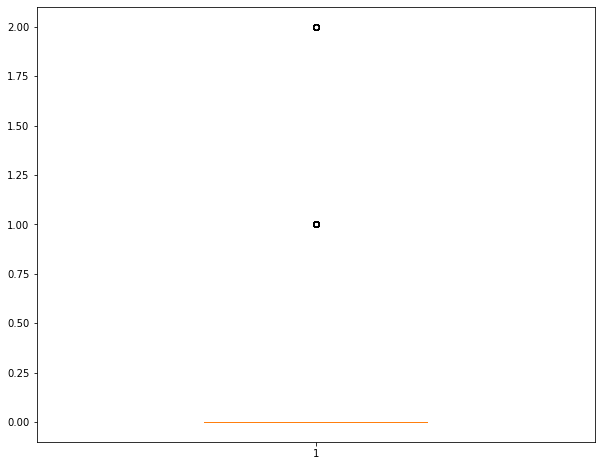

In [55]:
plt.figure(figsize=(10,8))
plt.boxplot(data['Parch'],widths=0.4)
plt.show()

In [56]:
#Checking the outliers present in the column fare

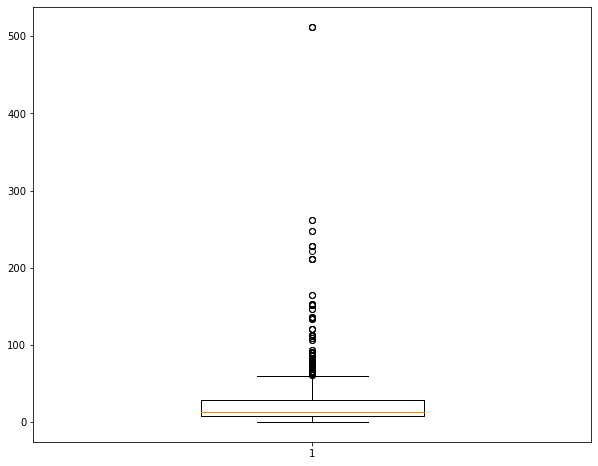

In [57]:
plt.figure(figsize=(10,8))
plt.boxplot(data['Fare'],widths=0.4)
plt.show()

In [58]:
#as it is a highly right skewed we will use 30 percentile increment in each quartile

In [59]:
q1=np.percentile(data['Fare'],30,interpolation='midpoint')
q2=np.percentile(data['Fare'],60,interpolation='midpoint')
q3=np.percentile(data['Fare'],90,interpolation='midpoint')
iqr=q3-q1
lw=q1-1.5*iqr
up=q3+1.5*iqr
print(lw,up)

-97.04375 183.20625


In [60]:
outlier=[]
for x in data['Fare']:
    if((x>up)or(x<lw)):
        outlier.append(x)

In [61]:
outlier

[247.5208,
 512.3292,
 247.5208,
 262.375,
 211.5,
 227.525,
 221.7792,
 227.525,
 512.3292,
 211.3375,
 227.525,
 227.525,
 211.3375,
 512.3292,
 262.375,
 211.3375]

In [62]:
indx=data['Fare']>up
dt=data.loc[indx].index
data.drop(dt,inplace=True)

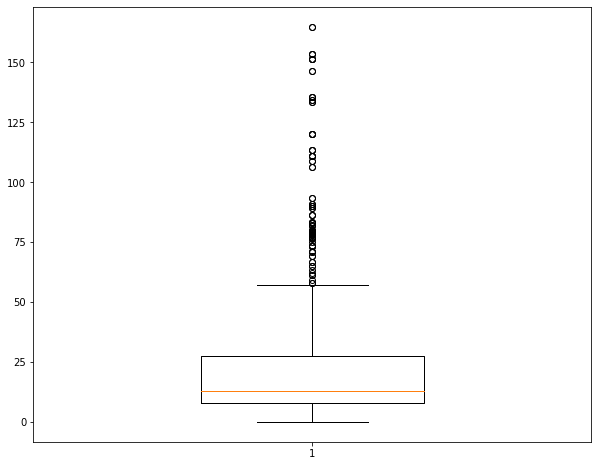

In [63]:
plt.figure(figsize=(10,8))
plt.boxplot(data['Fare'],widths=0.4)
plt.show()

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target) 

In [64]:
#we will do one hot encoding to the categorical data

In [65]:
data=pd.get_dummies(data,columns=['Sex','Embarked'])

In [66]:
data.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,0,1
5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,1,0,0,1


In [67]:
# we willcheck the correation

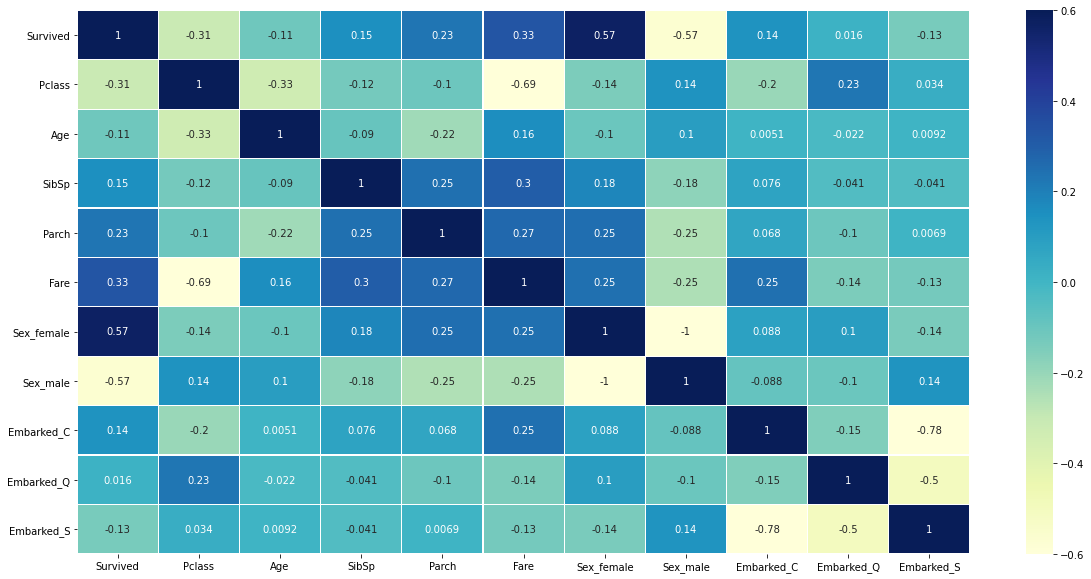

In [68]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,vmin=-0.6,vmax=0.6,annot=True,linewidths=0.2,cmap='YlGnBu')
plt.show()

In [69]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [70]:
y=data['Survived']
x=data.drop(['Survived','Name'],axis=1)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [72]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [73]:
from sklearn.metrics import mean_squared_error
print('MSE value:',mean_squared_error(y_test,predictions))

MSE value: 0.12370118767607241


In [74]:
from sklearn.metrics import r2_score
print('r square value:',r2_score(y_test,predictions))

r square value: 0.4681849748599406


In [75]:
#we will do Min Max Scaling and check the predictivity of the model

In [76]:
x=data.drop(['Survived','Name'],axis=1)

In [77]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,2.296069,30.022322,0.304668,0.239558,25.900741,0.334152,0.665848,0.190418,0.088452,0.721130
std,0.831164,12.642198,0.523074,0.550395,29.996558,0.471983,0.471983,0.392872,0.284126,0.448719
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,27.540600,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,2.000000,2.000000,164.866700,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
from sklearn import preprocessing

In [79]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [80]:
x=min_max.fit_transform(x)

In [81]:
x=pd.DataFrame(x)

In [82]:
x.describe()

,0,1,2,3,4,5,6,7,8,9
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,0.648034,0.371982,0.152334,0.119779,0.157101,0.334152,0.665848,0.190418,0.088452,0.721130
std,0.415582,0.158862,0.261537,0.275198,0.181944,0.471983,0.471983,0.392872,0.284126,0.448719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.283740,0.000000,0.000000,0.047892,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.346569,0.000000,0.000000,0.078852,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.434531,0.500000,0.000000,0.167048,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print('MSE value:',mean_squared_error(y_test,predictions))
print('r square value:',r2_score(y_test,predictions))

MSE value: 0.12370118767607241
r square value: 0.4681849748599406


In [84]:
#even after doing min max scale our MSE and R square value are almost equal